# Point in polygon

In [ ]:
using Plots
using Revise

In [ ]:
using PolygonAlgorithms
using PolygonAlgorithms: x_coords, y_coords

In [ ]:
H_polygon = [
    (2.0, 10.0), (4.0, 10.0), (4.0, 6.0), (6.0, 6.0), (6.0, 10.0), (8.0, 10.0), 
    (8.0, 1.0), (6.0, 1.0), (6.0, 4.0), (4.0, 4.0), (4.0, 1.0), (2.0, 1.0)
]
L_polygon = [(2.0, 10.0), (4.0, 10.0), (4.0, 3.0), (7.0, 3.0), (7.0, 1.0), (2.0, 1.0)]
rectangle = [(2.0, 9.0), (8.0, 9.0), (8.0, 2.0), (2.0, 2.0)]
pentagon = [(1.0, 7.0), (5.0, 10.0), (9.0, 7.0), (7.0, 2.0), (3.0, 2.0)]
scew_H = [
    (2.0, 10.0), (4.0, 10.0), (4.0, 6.0), (6.0, 6.0), (6.0, 10.0), 
    (8.0, 10.0), (8.0, 1.0), (6.0, 1.0), (6.0, 4.0), (4.0, 4.0), (4.0, 2.0), (2.0, 2.0)
]
fish = [(2.0, 5.0), (5.0, 8.0), (8.0, 3.0), (8.0, 8.0), (6.0, 3.0), (3.0, 3.0)]

polygons = [H_polygon, L_polygon, rectangle, pentagon, scew_H, fish];

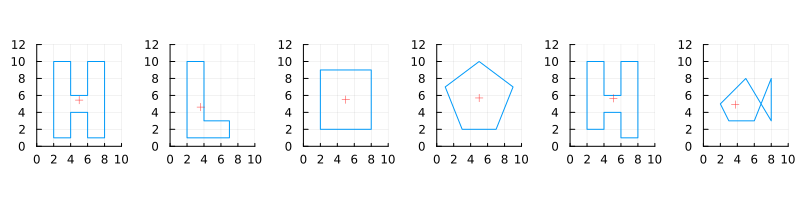

In [ ]:
frames = []
for polygon in polygons
    idxs = vcat(1:length(polygon), 1)
    x = x_coords(polygon[idxs])
    y = y_coords(polygon[idxs])
    frame = plot(x, y, aspectratio=1, ylims=(0, 12), xlims=(0,10), label="")

    centroid = centroid_polygon(polygon)
    plot!(frame, [centroid[1]], [centroid[2]], markershape=:cross, color=:red, label="")

    push!(frames, frame)
end

plot(frames..., layout = (1, length(polygons)), size=(800, 200))

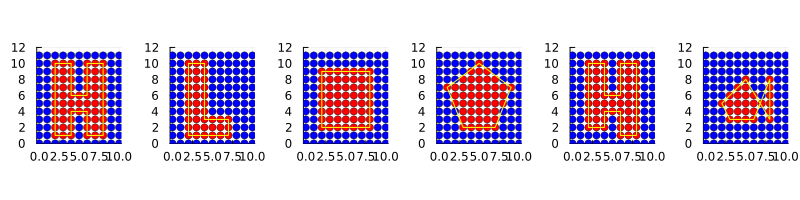

In [ ]:
frames = []
for polygon in polygons
    inside = []
    points = []
    for x in 0.0:10.0
        for y in 0.0:11.0
            push!(inside, point_in_polygon((x, y), polygon))
            push!(points, (x, y))
        end
    end
    
    x = [point[1] for point in points]
    y = [point[2] for point in points]
    color = [is_inside ? "red" : "blue" for is_inside in inside]
    inside_plot = scatter(x, y, color=color, label="")
    x = x_coords(polygon)
    y = y_coords(polygon)
    plot!(inside_plot, (vcat(x, x[1])), vcat(y, y[1]), label="", color=:yellow, )
    plot!(aspectratio=1, ylims=(0, 12))
    push!(frames, inside_plot)
end
plot(frames..., layout = (1, length(polygons)), size=(800, 200))